# **CBM414 Procesamiento digital de señales Biomédicas, Laboratorio 02**
## Profesor: David Ortiz
=========================================

### Resumen de actividades:
Este laboratorio tiene como objetivo observar el efecto del alias en las señales, ver la transformada de Fourier de las señales, para obtener su espectro, ver la replicación y las frecuencias de las señales y aplicar filtros antialias.

### Puntos a Tratar

- **Aliasing:** Programar y visualizar señales senoidales sin y con aliasing.
- **Transformada de Fourier:** Calcular la transformada de Fourier de una señal dada y analizar su espectro.
- **Filtrado de Señales:** Implementar un filtro digital y observar sus efectos en el dominio del tiempo y la frecuencia.

### Objetivos de Aprendizaje

- Reforzar los aspectos teóricos de la clase, en forma práctica utilizando Python.


In [1]:
import numpy as np
import scipy as sp
from scipy import signal
from scipy.fft import fft, ifft, fftfreq
import matplotlib.pylab as plt

### Aliasing
Creemos una señal que esté compuesta de varias funciones senoidales. Para efectos de este ejercicio vamos a utilizar un intervalo temporal $t\in[0,1]$en segundos $(s)$, y funciones $\cos(2\pi f_n t)$ donde $f_n, n\in\mathbb{N}^+$, serán diferentes frecuencias en Hz que conformarán la señal. Propón una señal compuesta de $N = 3,4,5$ cosenos con frecuencias diferentes (no repetidas) y que cumplan $1<f_n<50$Hz, es decir

\begin{equation}
  x(t) = \sum_{n=1}^{N}\cos(2\pi f_n t), \quad 1<f_n<50, t\in[0,1]
\end{equation}

Determina cuál es tú frecuencia máxima entre las 5 que elegiste y nómbrala $f_{max}$. NOTA: es crear UNA sola señal con 3, 4 o 5 cosenos

EJERCICIO EN CLASE (1 Punto):
1. (0.1 puntos) Grafica utilizando `matplotlib` la señal propuesta con una frecuencia de muestreo $f_s >> 2f_{max}$, i.e., una frecuencia de muestreo mucho mayor a la frecuencia del teorema de muestreo de Nyquist.
2. (0.1 puntos) Grafica la señal propuesta con una frecuencia de muestreo $f_s = 2f_{max}$.
3. (0.1 puntos) Grafica la señal propuesta con una frecuencia de muestreo $0< f_s << 2f_{max}$, i.e., una frecuencia de muestreo mucho menor a la frecuencia del teorema de muestreo de Nyquist.
4. (0.1 puntos) Grafica la señal propuesta con una frecuencia de muestreo $f_s = f_{max}$.
5. (0.3 puntos) Utilizando las frecuencias $f_s$ y $f_{max}$ que tú mismo diste para los casos 3 y 4, calcula y reporta la frecuencia alias en ambos casos. Luego, considerando únicamente la componente senoidal para la que $f_{max}$ sufre de aliasing, has una gráfica donde se superpongan los casos 1, 2 y 3, es decir, una gráfica que contenga la componente senoidal con frecuencia $f_{max}$ y las frecuencias de muestreo $f_s$ que determinaste en cada caso indicado.
6. (0.3 puntos) Analiza y da una breve explicación de lo que observas en las gráficas de los numerales 1 a 5, dando énfasis en cómo la componente alias "corrompe" o "daña" la señal propuesta.

In [13]:
# Definir el tiempo de inicio y fin de la señal
t0, t1 = 0, 1

# Definir las frecuencias de las señales
f0, f1, f2, f3, f4 = 6, 14, 22, 33, 45  

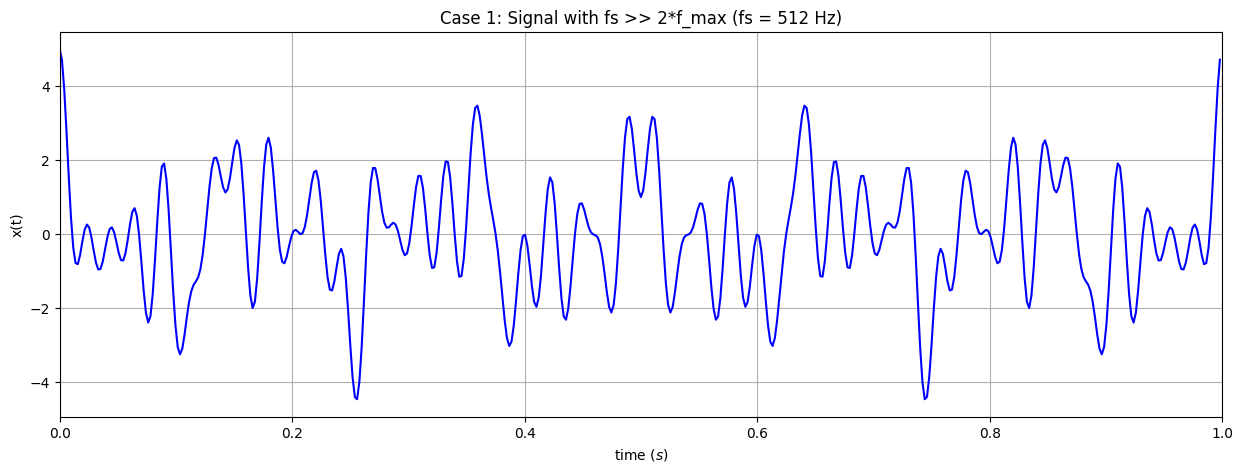

In [14]:
fs1 = 512  # Sampling frequency 1

t1 = np.linspace(t0, t1, int(fs1), endpoint=False)

segnal1 = np.cos(2 * np.pi * f0 * t1) + np.cos(2 * np.pi * f1 * t1) + np.cos(2 * np.pi * f2 * t1) + np.cos(2 * np.pi * f3 * t1) + np.cos(2 * np.pi * f4 * t1)

# Plot the signals
plt.figure(figsize=(15, 5))
plt.plot(t1, signal1, color='b')
plt.xlim(0, 1)
plt.title(f'Case 1: Signal with fs >> 2*f_max (fs = {fs1} Hz)')
plt.xlabel(r"time $(s)$")
plt.ylabel(r"x(t)")
plt.grid()
plt.show()


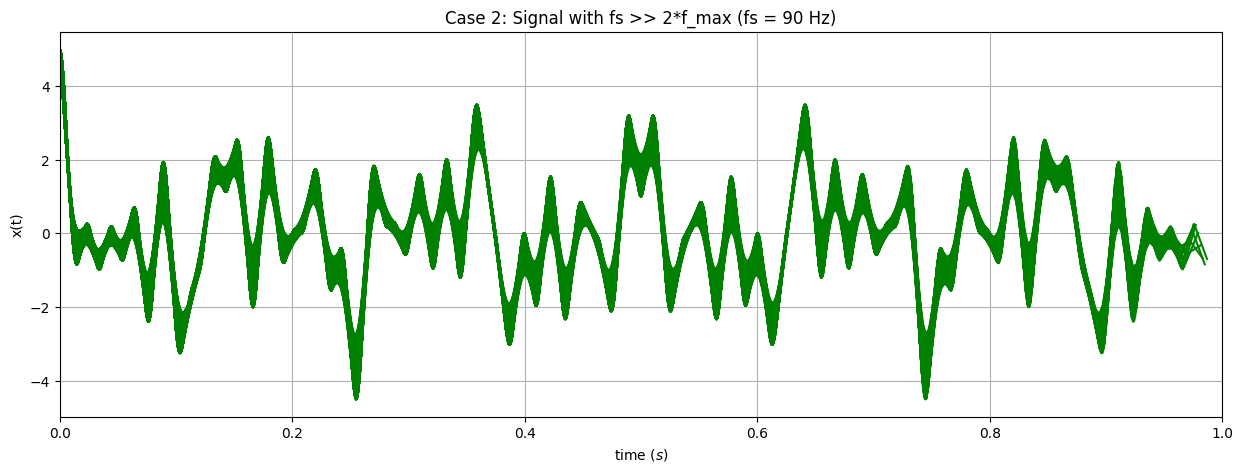

In [15]:
fs2 = 2 * f4  # Sampling frequency 2

t2 = np.linspace(t0, t1, int(fs2), endpoint=False)

segnal2 = np.cos(2 * np.pi * f0 * t2) + np.cos(2 * np.pi * f1 * t2) + np.cos(2 * np.pi * f2 * t2) + np.cos(2 * np.pi * f3 * t2) + np.cos(2 * np.pi * f4 * t2)

# Plot for case 2
plt.figure(figsize=(15, 5))
plt.plot(t2, signal2, color='g')
plt.xlim(0, 1)
plt.title(f'Case 2: Signal with fs >> 2*f_max (fs = {fs2} Hz)')
plt.xlabel(r"time $(s)$")
plt.ylabel(r"x(t)")
plt.grid()
plt.show()


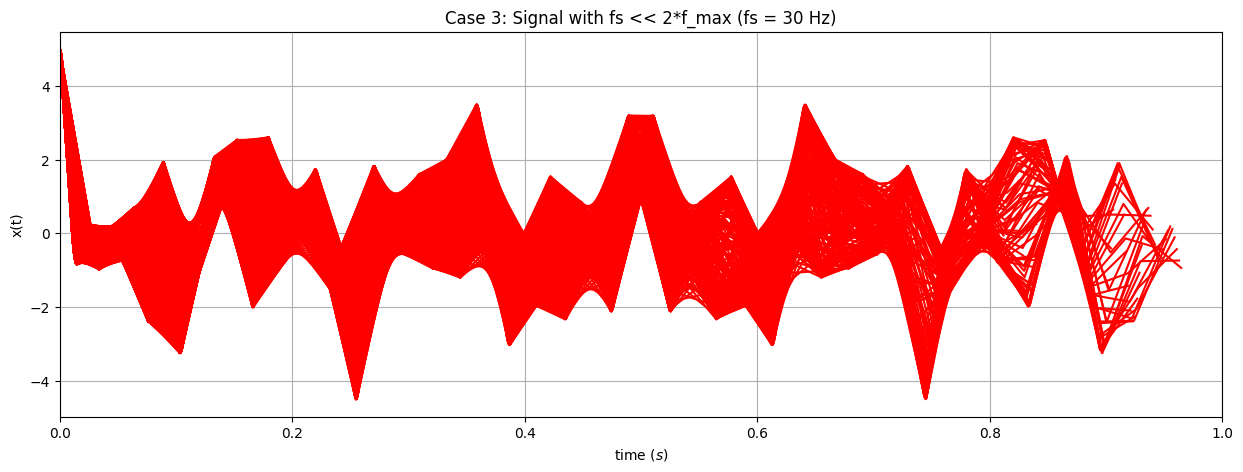

In [16]:
fs3 = 30  # Sampling frequency 3

t3 = np.linspace(t0, t1, int(fs3), endpoint=False)

segnal3 = np.cos(2 * np.pi * f0 * t3) + np.cos(2 * np.pi * f1 * t3) + np.cos(2 * np.pi * f2 * t3) + np.cos(2 * np.pi * f3 * t3) + np.cos(2 * np.pi * f4 * t3)

# Plot for case 3
plt.figure(figsize=(15, 5))
plt.plot(t3, signal3, color='r')
plt.xlim(0, 1)
plt.title(f'Case 3: Signal with fs << 2*f_max (fs = {fs3} Hz)')
plt.xlabel(r"time $(s)$")
plt.ylabel(r"x(t)")
plt.grid()
plt.show()


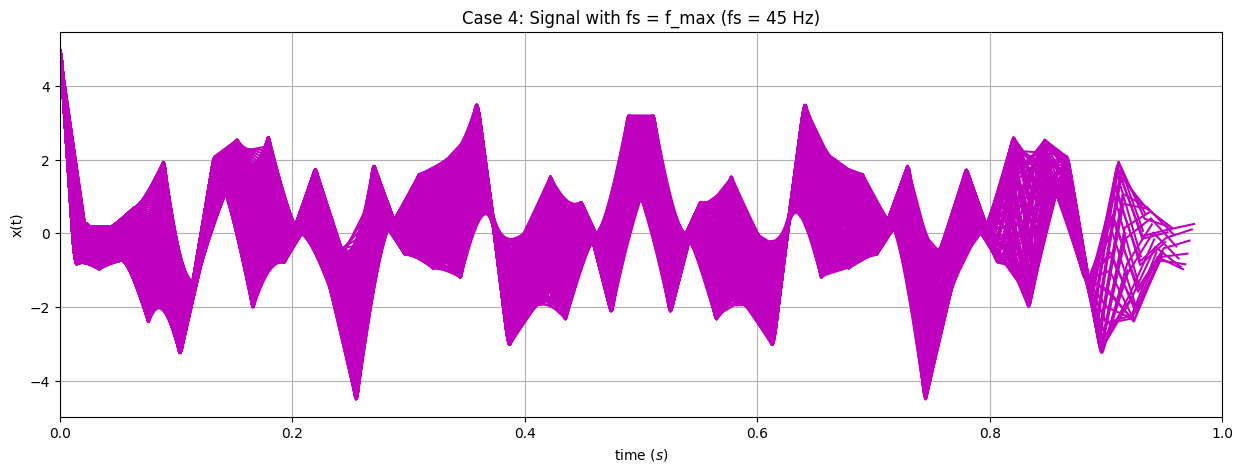

In [17]:
fs4 = f4 # Sampling frequency 4

t4 = np.linspace(t0, t1, int(fs4), endpoint=False)

segnal4 = np.cos(2*np.pi*f0*t4) + np.cos(2*np.pi*f1*t4) + np.cos(2*np.pi*f2*t4) + np.cos(2*np.pi*f3*t4) + np.cos(2*np.pi*f4*t4)

# Plot for Case 4
plt.figure(figsize=(15, 5))
plt.plot(t4, segnal4, color='m')
plt.xlim(0, 1)
plt.title(f'Case 4: Signal with fs = f_max (fs = {fs4} Hz)')
plt.xlabel(r"time $(s)$")
plt.ylabel(r"x(t)")
plt.grid()

plt.show()

In [20]:
# Función para calcular la frecuencia alias
def calcular_frecuencia_alias(f, fs):
    return np.abs(f - np.round(f / fs) * fs)

# Calcular las frecuencias alias para el caso 3
alias_f0_case3 = calcular_frecuencia_alias(f0, fs3)
alias_f1_case3 = calcular_frecuencia_alias(f1, fs3)
alias_f2_case3 = calcular_frecuencia_alias(f2, fs3)
alias_f3_case3 = calcular_frecuencia_alias(f3, fs3)
alias_f4_case3 = calcular_frecuencia_alias(f4, fs3)

# Imprimir resultados para el caso 3
print("Caso 3 (fs = 30 Hz):")
print(f"f0 (6 Hz): {alias_f0_case3} Hz")
print(f"f1 (14 Hz): {alias_f1_case3} Hz")
print(f"f2 (22 Hz): {alias_f2_case3} Hz")
print(f"f3 (33 Hz): {alias_f3_case3} Hz")
print(f"f4 (45 Hz): {alias_f4_case3} Hz")

# Caso 4: Frecuencia de muestreo fs4 = f4

# Calcular las frecuencias alias para el caso 4
alias_f0_case4 = calcular_frecuencia_alias(f0, fs4)
alias_f1_case4 = calcular_frecuencia_alias(f1, fs4)
alias_f2_case4 = calcular_frecuencia_alias(f2, fs4)
alias_f3_case4 = calcular_frecuencia_alias(f3, fs4)
alias_f4_case4 = calcular_frecuencia_alias(f4, fs4)

# Imprimir resultados para el caso 4
print("\nCaso 4 (fs = 45 Hz):")
print(f"f0 (6 Hz): {alias_f0_case4} Hz")
print(f"f1 (14 Hz): {alias_f1_case4} Hz")
print(f"f2 (22 Hz): {alias_f2_case4} Hz")
print(f"f3 (33 Hz): {alias_f3_case4} Hz")
print(f"f4 (45 Hz): {alias_f4_case4} Hz")


Caso 3 (fs = 30 Hz):
f0 (6 Hz): 6.0 Hz
f1 (14 Hz): 14.0 Hz
f2 (22 Hz): 8.0 Hz
f3 (33 Hz): 3.0 Hz
f4 (45 Hz): 15.0 Hz

Caso 4 (fs = 45 Hz):
f0 (6 Hz): 6.0 Hz
f1 (14 Hz): 14.0 Hz
f2 (22 Hz): 22.0 Hz
f3 (33 Hz): 12.0 Hz
f4 (45 Hz): 0.0 Hz


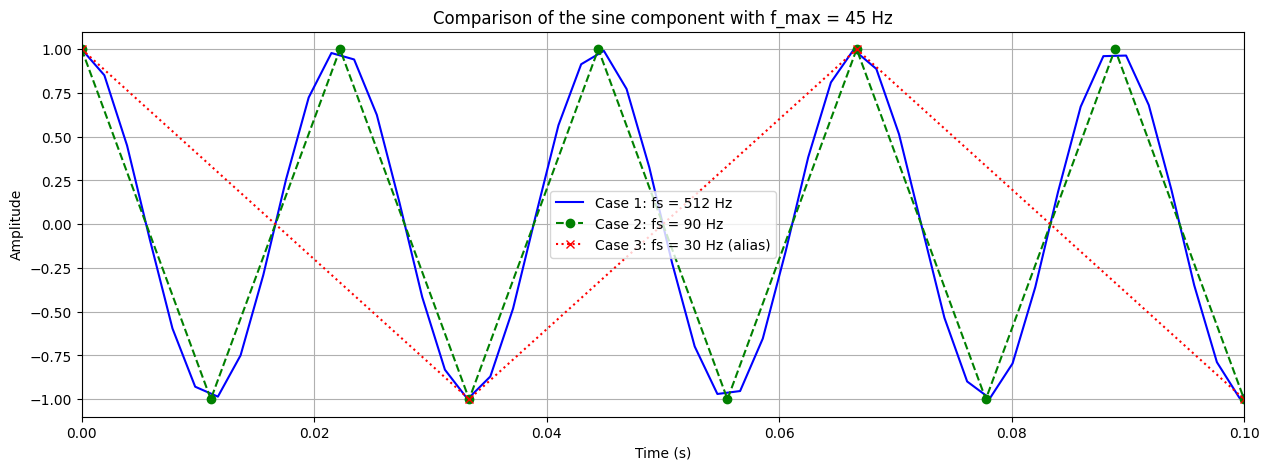

In [21]:
# Define parameters
t0, t1 = 0, 1  # Time range in seconds
f_max = 45  # Maximum frequency of the signal in Hz
fs1 = 512  # Sampling frequency for Case 1 (fs >> 2*f_max)
fs2 = 2 * f_max  # Sampling frequency for Case 2 (fs = 2*f_max)
fs3 = 30  # Sampling frequency for Case 3 (fs << 2*f_max)

# Define the time vectors for each case
t_case1 = np.linspace(t0, t1, int(fs1), endpoint=False)
t_case2 = np.linspace(t0, t1, int(fs2), endpoint=False)
t_case3 = np.linspace(t0, t1, int(fs3), endpoint=False)

# Function to calculate the alias frequency
def calculate_alias_frequency(f, fs):
    return np.abs(f - np.round(f / fs) * fs)

# Calculate the alias frequencies for f_max = 45 Hz for Case 3
alias_fmax_case3 = calculate_alias_frequency(f_max, fs3)

# Signal corresponding to the maximum frequency f_max for each case
signal_case1 = np.cos(2 * np.pi * f_max * t_case1)  # Case 1
signal_case2 = np.cos(2 * np.pi * f_max * t_case2)  # Case 2
signal_case3 = np.cos(2 * np.pi * alias_fmax_case3 * t_case3)  # Case 3 (with aliasing)

# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(t_case1, signal_case1, label=f'Case 1: fs = {fs1} Hz', color='b')
plt.plot(t_case2, signal_case2, label=f'Case 2: fs = {fs2} Hz', color='g', linestyle='--', marker='o')
plt.plot(t_case3, signal_case3, label=f'Case 3: fs = {fs3} Hz (alias)', color='r', linestyle=':', marker='x')

plt.xlim(0, 0.1)  # Limit x-axis for clarity
plt.title(f'Comparison of the sine component with f_max = {f_max} Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()
plt.show()

### Transformada de Fourier
A continuación vamos a realizar un análisis de frecuencias de la señal $x(t)$ que determinaste. **Conserva las mismas frecuencias del ejercicio anterior**.

**Nota importante:** para este ejercicio utilizaremos la función `fft` (*Fast Fourier Transform*) de `scipy`. Esta es la aplicación de la transformada DFT (*Discrete Fourier Trasnform*), la cual a diferencia de la FT y la DTFT, esta es discreta tanto en tiempo como en frecuencia. Esta función y su transformada la estudiaremos más adelante en el curso.

Puedes acceder a este interesante tutorial en scipy: https://docs.scipy.org/doc/scipy/tutorial/fft.html

A continuación veremos un ejemplo de como se aplica la FFT:

EJERCICIO EN CLASE (1 Punto):
1. (0.1 puntos) Utilizando `matplotlib`, grafica el espectro de la señal original $x(t)$ con una frecuencia de muestreo $f_s >> 2f_{max}$, i.e., una frecuencia de muestreo mucho mayor a la frecuencia del teorema de muestreo de Nyquist.
2. (0.1 puntos) Grafica el espectro de la señal donde $f_s = 2f_{max}$.
3. (0.1 puntos) Grafica el espectro de la señal donde $0< f_s << 2f_{max}$.
4. (0.1 puntos) Grafica el espectro de la señal donde $f_s = f_{max}$.
5. (0.3 puntos) Interpreta la fórmula $f_a = f mod(f_s) $ en el contexto del aliasing. Explica cómo esta fórmula te ayuda a predecir la posición de las componentes aliasadas en el espectro muestreado y verifica si los resultados observados en tus gráficas coinciden con esta predicción.
6. (0.3 puntos) Analiza el espectro resultante en de los puntos 1 a 4. Explica cómo y por qué las componentes de frecuencia alias se manifiestan en el espectro, y describe su posición relativa dentro del intervalo de Nyquist. ¿Cómo afecta la frecuencia de muestreo seleccionada a la presencia de aliasing en el espectro?

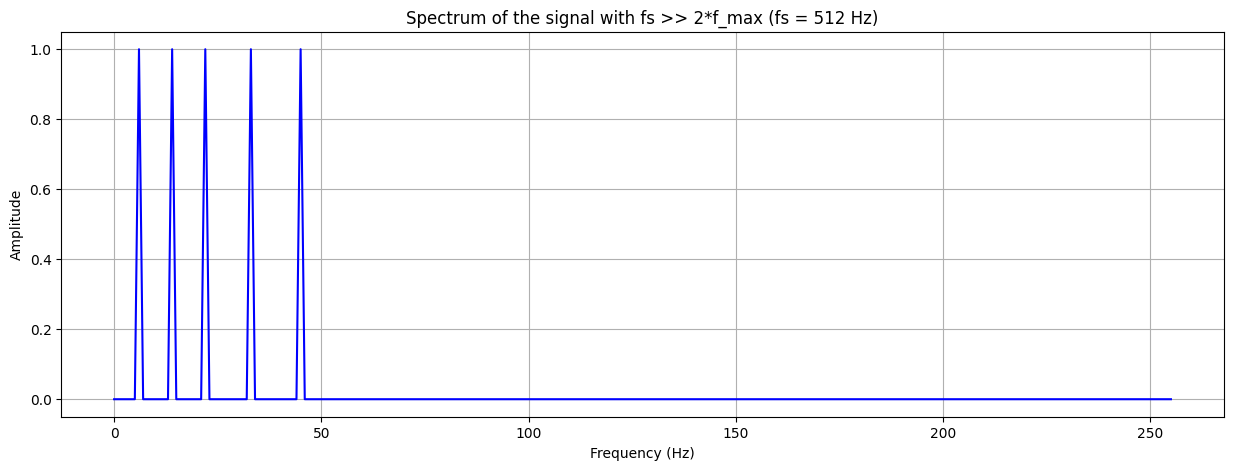

In [22]:
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pylab as plt

# Frequencies and signal definition
f0, f1, f2, f3, f4 = 6, 14, 22, 33, 45
fs1 = 512  # Sampling frequency much greater than 2*f_max

t1 = np.linspace(0, 1, fs1, endpoint=False)
signal = np.cos(2*np.pi*f0*t1) + np.cos(2*np.pi*f1*t1) + np.cos(2*np.pi*f2*t1) + np.cos(2*np.pi*f3*t1) + np.cos(2*np.pi*f4*t1)

# FFT of the signal
yf = fft(signal)
xf = fftfreq(fs1, 1/fs1)[:fs1//2]

# Plot spectrum
plt.figure(figsize=(15, 5))
plt.plot(xf, 2.0/fs1 * np.abs(yf[:fs1//2]), color='b')
plt.title(f'Spectrum of the signal with fs >> 2*f_max (fs = {fs1} Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

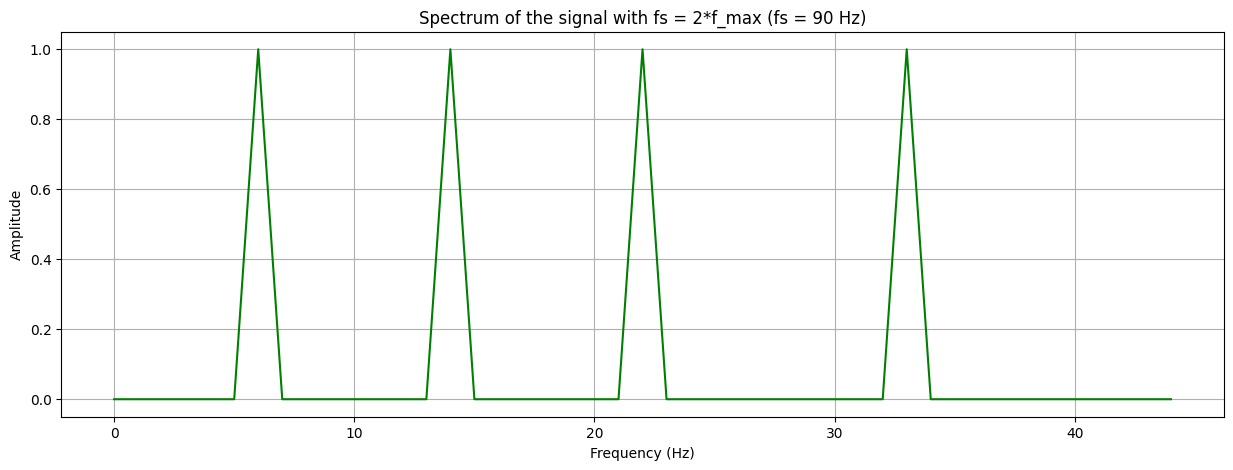

In [23]:
fs2 = 2 * f4  # Nyquist sampling frequency
t2 = np.linspace(0, 1, fs2, endpoint=False)
signal2 = np.cos(2*np.pi*f0*t2) + np.cos(2*np.pi*f1*t2) + np.cos(2*np.pi*f2*t2) + np.cos(2*np.pi*f3*t2) + np.cos(2*np.pi*f4*t2)

# FFT and spectrum
yf2 = fft(signal2)
xf2 = fftfreq(fs2, 1/fs2)[:fs2//2]

# Plot spectrum
plt.figure(figsize=(15, 5))
plt.plot(xf2, 2.0/fs2 * np.abs(yf2[:fs2//2]), color='g')
plt.title(f'Spectrum of the signal with fs = 2*f_max (fs = {fs2} Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

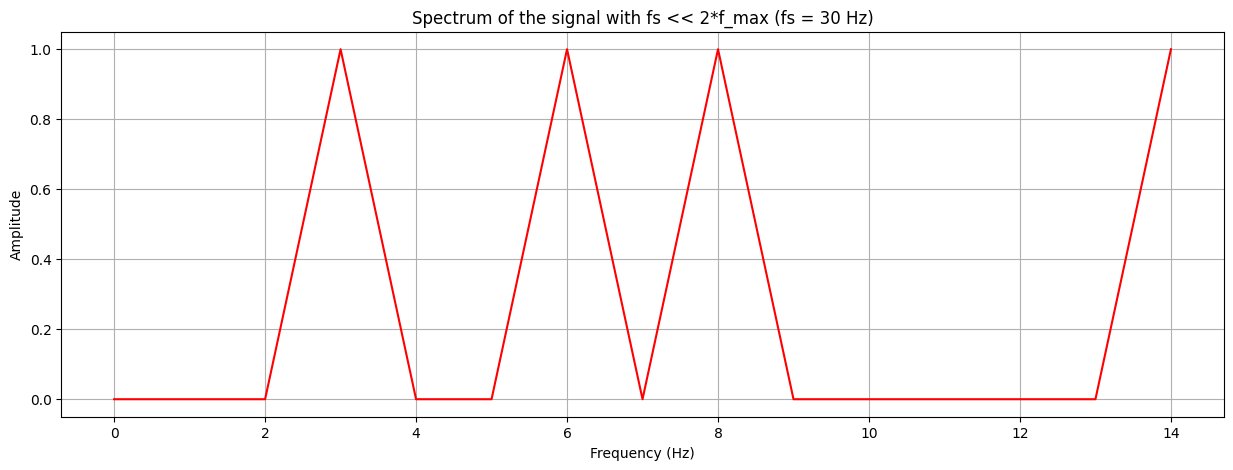

In [24]:
fs3 = 30  # Sampling frequency much lower than Nyquist rate
t3 = np.linspace(0, 1, fs3, endpoint=False)
signal3 = np.cos(2*np.pi*f0*t3) + np.cos(2*np.pi*f1*t3) + np.cos(2*np.pi*f2*t3) + np.cos(2*np.pi*f3*t3) + np.cos(2*np.pi*f4*t3)

# FFT and spectrum
yf3 = fft(signal3)
xf3 = fftfreq(fs3, 1/fs3)[:fs3//2]

# Plot spectrum
plt.figure(figsize=(15, 5))
plt.plot(xf3, 2.0/fs3 * np.abs(yf3[:fs3//2]), color='r')
plt.title(f'Spectrum of the signal with fs << 2*f_max (fs = {fs3} Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

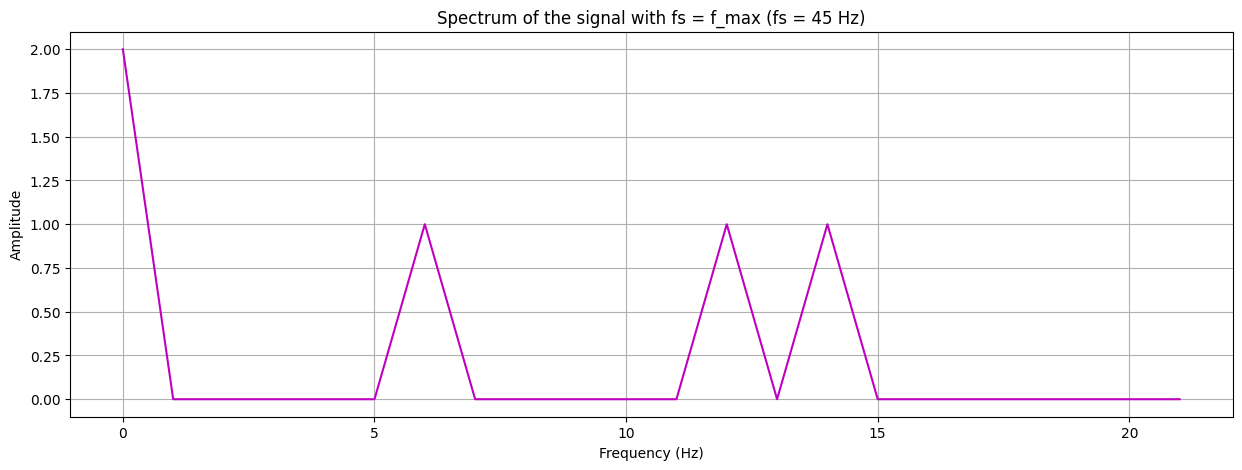

In [25]:
fs4 = f4  # Sampling frequency equal to f_max
t4 = np.linspace(0, 1, fs4, endpoint=False)
signal4 = np.cos(2*np.pi*f0*t4) + np.cos(2*np.pi*f1*t4) + np.cos(2*np.pi*f2*t4) + np.cos(2*np.pi*f3*t4) + np.cos(2*np.pi*f4*t4)

# FFT and spectrum
yf4 = fft(signal4)
xf4 = fftfreq(fs4, 1/fs4)[:fs4//2]

# Plot spectrum
plt.figure(figsize=(15, 5))
plt.plot(xf4, 2.0/fs4 * np.abs(yf4[:fs4//2]), color='m')
plt.title(f'Spectrum of the signal with fs = f_max (fs = {fs4} Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

Para este ejercicio utilizaremos como ejemplo una funcion _chirp_, la cual está definida matemáticamente como

\begin{equation}
  x(t) = \cos(2\pi\phi(f_0, f_1; t)+\phi_0), \quad t\in \mathbb{R}
\end{equation}

Como pueden ver, es una función culla frecuencia está en terminos de una función $\phi(f_0, f_1; t)$ donde $t\in[t_0,t_1]$ es el intervalo de tiempo, donde $f_0$ es una frecuencia inicial en $t_0$, $f_1$ es una frecuencia final en $t_1$, y $\phi_0$ será un desfase. La _chirp_ más básica es la lineal, i.e., donde  tenemos

\begin{equation}
    \phi(f_0, f_1; t) = f_0 + (f_1 - f_0) \cdot \frac{t}{t_1}
\end{equation}

Sin pérdida de generalidad, y para efectos del ejercicio, podemos decir que $t\in[0,1]$ y que $\phi_0 = 0$.

Grafica la función chirp con los parámetros $f_0 = 0$Hz, $f_1 = 50$Hz, $t_1=1$s y un número de muestras `Nsample` = 512.

PASOS:

1. define el intervalo de tiempo con `np.linspace`
2. define la función chirp utilizando `scipy`, es decir, la función:

`signal.chirp(t, f0, t1, f1, method='linear', phi=0, vertex_zero=True)`


EJERCICIO EN CLASE (1 Punto):

1. (0.2 puntos) Utilizando `matplotlib`, grafica el espectro de la señal chirp  con una frecuencia de muestreo $f_s >> 2f_{1}$, i.e., una frecuencia de muestreo mucho mayor a la frecuencia del teorema de muestreo de Nyquist.
2. (0.2 puntos) Grafica el espectro de la señal con una frecuencia de muestreo $f_s = 2f_{1}$.
3. (0.2 puntos) Grafica el espectro de la señal con una frecuencia de muestreo $f_s = f_{1}$.
4. (0.4 puntos) Analiza y da una breve explicación de lo que observas en las tres gráficas, dando énfasis en como la componente alias "corrompe" o "dañan" la señal original.

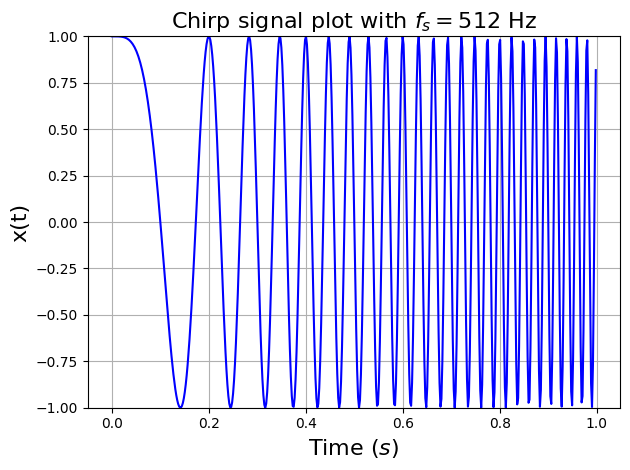

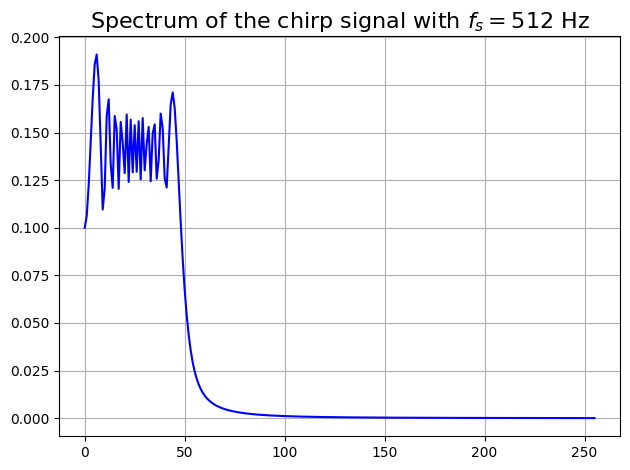

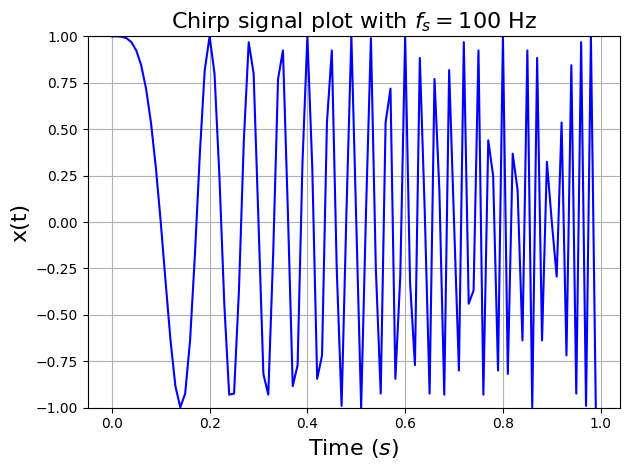

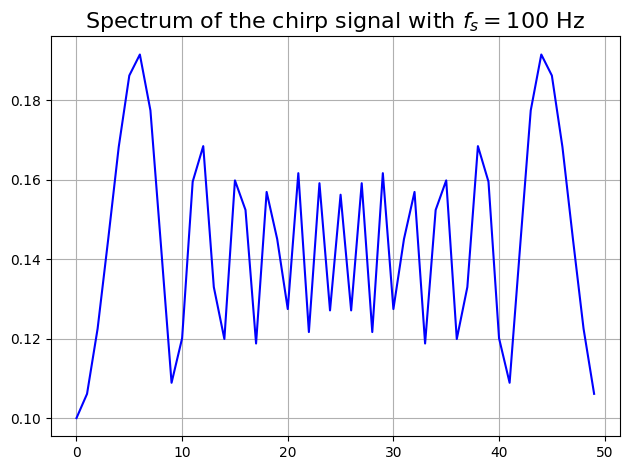

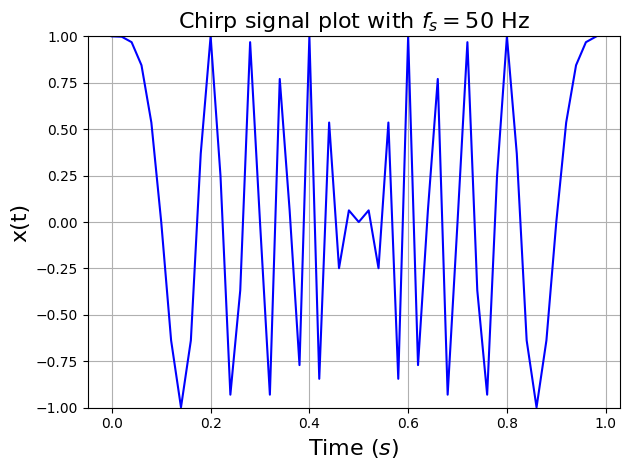

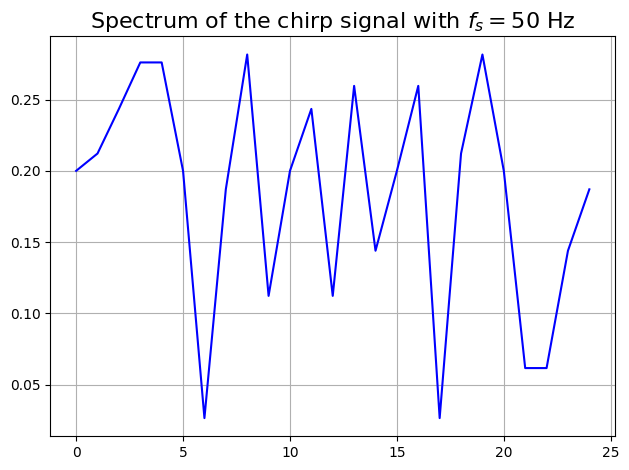

In [26]:
import numpy as np
from scipy.fft import fft
from scipy import signal 


# Signal chirp parameters definition
t0, t1 = 0, 1
f0, f1 = 0, 50
Nsample = 512

# Generation of the chirp signal for different sampling frequencies
def plot_chirp_and_spectrum(fs):
    t = np.linspace(t0, t1, int(Nsample * fs / 512), endpoint=False)
    chirp_signal = signal.chirp(t, f0, t1, f1, method='linear')

    # Plot of the chirp signal in time domain
    plt.figure()
    plt.plot(t, chirp_signal, color='b')
    plt.ylim(-1, 1)
    plt.xlabel(r"Time $(s)$", size=16)
    plt.ylabel(r"x(t)", size=16)
    plt.title(f'Chirp signal plot with $f_s = {fs}$ Hz', size=16)
    plt.grid()
    plt.tight_layout()
    plt.show()

    # FFT of the chirp signal
    yf = fft(chirp_signal)
    xf = fftfreq(len(chirp_signal), 1 / fs)[:len(chirp_signal) // 2]

    # Plot of the spectrum
    plt.figure()
    plt.plot(xf, 2.0 / len(chirp_signal) * np.abs(yf[:len(chirp_signal) // 2]), color='b')
    plt.title(f'Spectrum of the chirp signal with $f_s = {fs}$ Hz', size=16)
    plt.grid()
    plt.tight_layout()
    plt.show()

# 1. Case: Sampling frequency fs >> 2f1
plot_chirp_and_spectrum(512)  # Example with fs much higher

# 2. Case: Sampling frequency fs = 2f1
plot_chirp_and_spectrum(2 * f1)  # Nyquist

# 3. Case: Sampling frequency fs = f1
plot_chirp_and_spectrum(f1)  # Aliasing


## Filtrado
A continuación veremos el teorema de la convolución en acción. Pueden encontrar una animación de esto en [wikipedia](https://es.wikipedia.org/wiki/Convoluci%C3%B3n).

Recordemos el teorema de convolución

\begin{equation}
  y = h*x = \int_{-\infty}^{\infty}x(t')h(t-t')dt' \rightarrow Y(\omega) = X(\omega)H(\omega)
\end{equation}

El siguiente código presenta un ejemplo de una señal cuadrada siendo filtrada por ella misma.

### Análisis de Fourier con señales analíticas (avanzado)

- Obtener la transformada de fourier
- modificar el número de muestras `Nsample=64,512`
- modificar el periodo `T=0.1,1`


#### Convolución discreta

La convolución discreta es una operación matemática que combina dos secuencias (o señales) en una nueva secuencia, donde cada elemento de la nueva secuencia es una suma ponderada de los productos de los elementos de las dos secuencias originales. Formalmente, si \( x[n] \) y \( h[n] \) son dos secuencias discretas, su convolución \( y[n] \) se define como:

\begin{equation}
y[n] = (x * h)[n] = \sum_{k=-\infty}^{\infty} x[k] \cdot h[n - k]
\end{equation}

Donde:

- $(x[k])$ es la primera secuencia.
- $(h[n - k])$ es la segunda secuencia desplazada por $(k)$ posiciones.
- La suma se realiza sobre todos los valores de $(k)$, lo que significa que cada punto de $(y[n])$ es la suma de los productos de los valores correspondientes de $(x[k])$ y $(h[n - k])$.

EJERCICIO 1 (1 Punto):

Crea una función `conv = convolucion_propia(señal_sin_filtrar,filtro)` que entregue la convolución entre dos funciones.

- (0.5 Puntos) fija `Nsamples` = 512 y utiliza la señal cuadrada del ejemplo para obtener una señal que puedes llamar *señal_sin_filtrar* y otra exactamente igual, que puedes llamar *filtro*. Utiliza la función de convolución que creaste para filtrar las señales según su rol (nombre). Grafica la salida de la convolución (señal filtrada) superpuesta con la señal filtrada utilizando la FFT.  
- (0.5 puntos)Has un breve análisis sobre el resultado, centrandote principalmente en el tiempo de computo. Para calcular el tiempo de computo puedes utilizar la función

```
%timeit -n 500 tu_funcion(señal1, señal2)
```

EJERCICIO 2 (1 Punto):
- (0.5 puntos) Utiliza la función `signal.convolve` de `scipy`

```
signal.convolve(signal, filter, method='fft')
signal.convolve(signal, filter, method='direct')
```
donde `method='fft'` significa que la convolución se realiza utulizando la FFT y ` method='direct'` es el método directo. Grafica para ambos casos y compara los resultados. Observa si hay diferencias.

- (0.5 puntos) prueba la convolución cambiando `Nsamples` = 5000, y calcula el tiempo de la siguiente forma.

```
%timeit -n 500 signal.convolve(scuad, fcuad, method='fft')
%timeit -n 500 signal.convolve(scuad, fcuad, method='direct')
```
Utilizando este mismo código, compara el tiempo de `Nsamples` = 512 y `Nsamples` = 5000. ¿Qué diferencias observas?¿El tiempo aumenta, disminuye o se mantiene igual para ambos métodos?


In [2]:
def square_wave_scipy(t, T):
    """
    Generates a square wave signal using scipy.

    - t (numpy array): Array of time points.
    - T (float): Period of the square wave.

    Returns:
    numpy array: Square wave signal.
    """
    return signal.square(2 * np.pi * t / T, duty=0.5)

In [3]:
def filter_square(t):
    return square_wave_scipy(t, 1)

T = 1
Nsample = 512
t = np.linspace(-1, 1, Nsample, endpoint=False)

scuad = square_wave_scipy(t, T)
fcuad = filter_square(t)

In [4]:
def custom_convolution(unfiltered_signal, filter_signal):
    """
    Performs the discrete convolution of two sequences x and h.

    Parameters:
    x: list or array, input sequence.
    h: list or array, impulse response (or filter sequence).

    Returns:
    y: list, result of the convolution.
    """
    # Lengths of the signals
    Nx = len(unfiltered_signal)
    Nh = len(filter_signal)

    # Initialize the convolved signal with zeros
    conv = np.zeros(Nx)

    # Convolution calculation
    for n in range(Nh):
        for k in range(Nx):
            pass 
            conv[k] += unfiltered_signal[k-n] * filter_signal[n]
    return 1.0 / Nx * conv

conv_result = custom_convolution(scuad, fcuad)

In [5]:

xf = fftfreq(Nsample, d=1 / Nsample)[:Nsample // 2]

sqf = fft(scuad)
sqff = fft(fcuad)

filtered_sqr = ifft(sqf * sqff).real

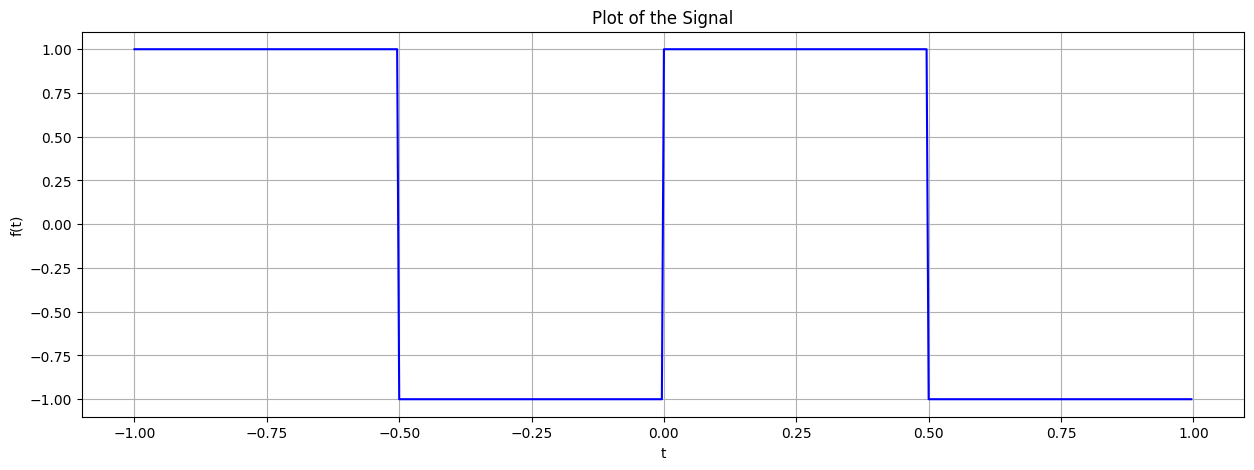

In [6]:
plt.figure(figsize=(15, 5))
plt.plot(t, scuad, color='b')
plt.xlabel("t")
plt.ylabel("f(t)")
plt.size = (15, 5)
plt.title('Plot of the Signal')
plt.grid()
plt.show()



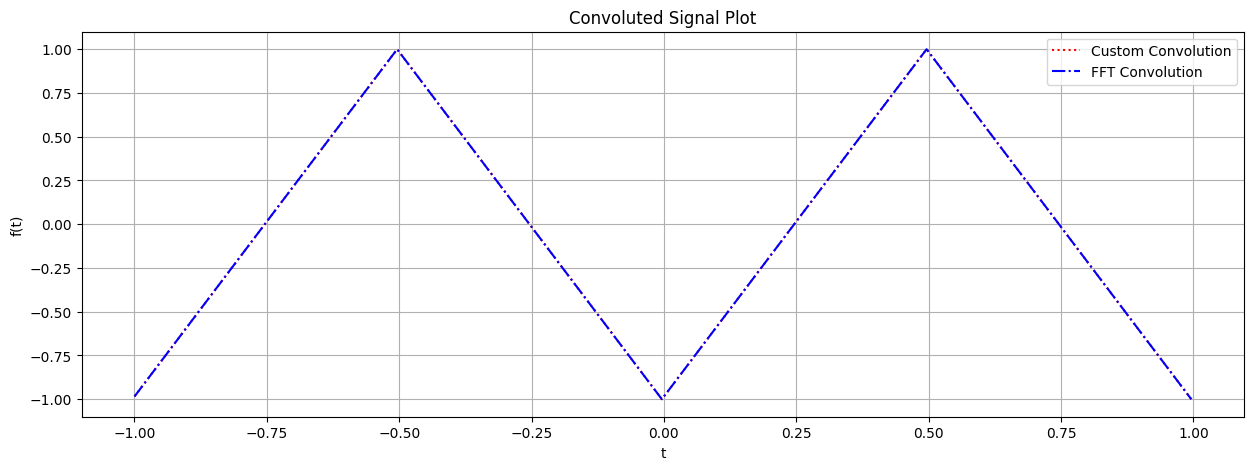

In [7]:
plt.figure(figsize=(15, 5))
plt.plot(t, conv_result, color='r', linestyle=':', label='Custom Convolution')
plt.plot(t, 1.0 / Nsample * filtered_sqr, color='b', linestyle='-.', label='FFT Convolution')
plt.legend()
plt.xlabel("t")
plt.ylabel("f(t)")
plt.title('Convoluted Signal Plot')
plt.grid()
plt.show()

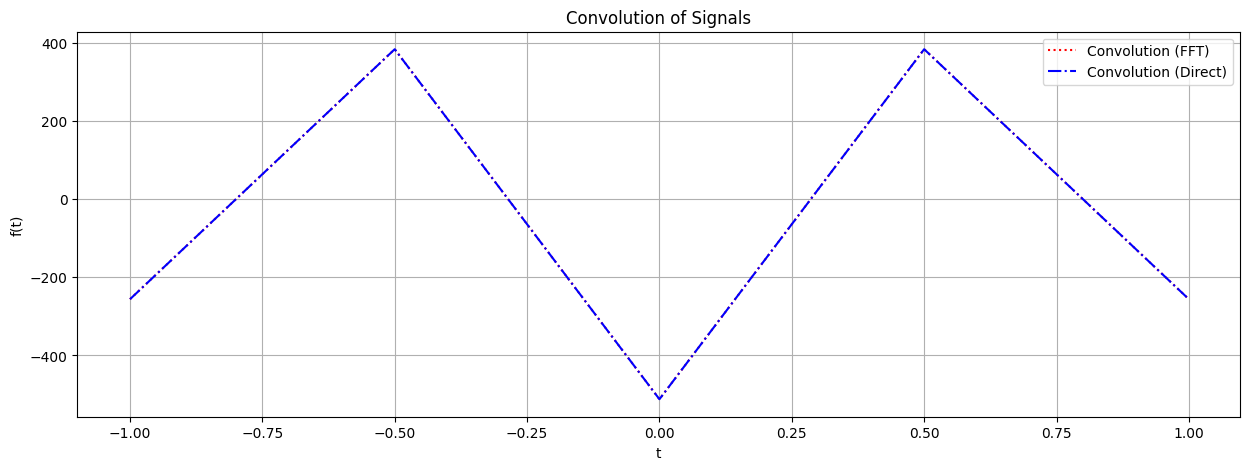

In [8]:
conv_fft = signal.convolve(scuad, fcuad, mode='same', method='fft')

conv_direct = signal.convolve(scuad, fcuad, mode='same', method='direct')

plt.figure(figsize=(15, 5))
plt.plot(t, conv_fft, color='r', linestyle=':', label='Convolution (FFT)')
plt.plot(t, conv_direct, color='b', linestyle='-.', label='Convolution (Direct)')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Convolution of Signals')
plt.legend()
plt.grid()
plt.show()

In [9]:
import timeit

In [10]:
# Measure time using FFT
fft_time_512 = timeit.timeit(lambda: signal.convolve(scuad, fcuad, mode='same', method='fft'), number=500)
print(f"Time using FFT with Nsample=512: {fft_time_512} seconds")

# Measure time using direct method
direct_time_512 = timeit.timeit(lambda: signal.convolve(scuad, fcuad, mode='same', method='direct'), number=500)
print(f"Time using direct method with Nsample=512: {direct_time_512} seconds")

Time using FFT with Nsample=512: 0.03657470000325702 seconds
Time using direct method with Nsample=512: 0.016344199975719675 seconds


In [11]:
# Change the sample size
Nsample = 5000
t = np.linspace(-1, 1, Nsample, endpoint=False)

# Square wave signal and filter
scuad = square_wave_scipy(t, T)
fcuad = filter_square(t)

# Measure time using FFT
fft_time_5000 = timeit.timeit(lambda: signal.convolve(scuad, fcuad, mode='same', method='fft'), number=500)
print(f"Time using FFT with Nsample=5000: {fft_time_5000} seconds")

# Measure time using direct method
direct_time_5000 = timeit.timeit(lambda: signal.convolve(scuad, fcuad, mode='same', method='direct'), number=500)
print(f"Time using direct method with Nsample=5000: {direct_time_5000} seconds")

Time using FFT with Nsample=5000: 0.10668810000061058 seconds
Time using direct method with Nsample=5000: 1.2346499999985099 seconds


## Prefiltros antialias
Una unidad que discutimos en clase es el decibelio o decibel (dB). Esta es una unidad de gran importancia para calcular la atenuación de sistemas, como filtros, reconstructores y señales de todo tipo, las cuales están representadas en el dominio de la frecuencia.

EJERCICIO (2 puntos):

Busca una o varias definiciones de la unidad decibel (dB) y de la atenuación. Puede ser por _Wikipedia_, _ChatGPT_, u otra fuente en internet y escríbela exactamente igual, sin importar que esté en inglés o español.

**Recuerda citar la fuente y escribir el texto entre comillas ("") y en letra cursiva para evitar caer en plagio. De no citar como corresponde, se te restarán 2 puntos sobre el total de la nota final del laboratorio**.

- (1 punto) Según las definiciones que encontraste, brevemente y con tus propias palabras, escribe tú interpretación de lo que significa decibel y atenuación, enfocandote en filtros y en señales.

- (1 punto) Mira la definición de atenuación en la pista inferior y centrate en la división que hay dentro de la expresión de magnitud $|\cdot|$. Describe que relación tiene esta división con las definiciones que encontraste sobre decibel y atenuación y cuál es el papel que juega la frecuencia $f_0$ en esta expresión.

**Pista**: Recuerda que la definición de la atenuación viene dada por la expresión (página 39 y 40, libro de Orfanidis)

\begin{align}
  A_{filtro}(f) &= -20 \log_{10}\left|\frac{H(f)}{H(f_0)}\right|\\
  A_{señal}(f) &= -20 \log_{10}\left|\frac{X(f)}{X(f_0)}\right|\\
\end{align}